<a href="https://colab.research.google.com/github/anuragverse/Deep-learning-/blob/main/Anomaly_Detection_using_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Query: Perform Anamoly Detection on ECG Dataset Using Autoencoders
1. Autoencoders will be trained using Normal datasets and Anamoly data will be used for Validating and Testing.
2. Once You Remove Anamoly data from training you will have normal dataset only present.
3. Build your autoencoder using normal dataset and Anamoly data will be used for Validating and Testing.
4. Validation was done only for Naormal Data but while validation we are giveing normal and anamoly data both and hence Validation loss when anamoly data would be passed to model will be higher than training loss due to additional anamoly data presence and model will not perform that well, But that is not the case here, as val loss is high due to presence of Anamoly data.
5. But this is the actual purpose for creating autoencoders for anamoly detection, so wherever loss is high it means it is anamoly for our model.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mpl.rcParams['figure.figsize'] = (10, 5)
mpl.rcParams['axes.grid'] = False

In [6]:
!wget http://www.timeseriesclassification.com/aeon-toolkit/ECG5000.zip

--2025-04-08 05:59:37--  http://www.timeseriesclassification.com/aeon-toolkit/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 212.78.75.243
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|212.78.75.243|:80... connected.
HTTP request sent, awaiting response... 200 
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  12.2MB/s    in 0.8s    

2025-04-08 05:59:38 (12.2 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]



In [7]:
!unzip ECG5000.zip
!rm ECG5000.zip

Archive:  ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [20]:
!cat "/content/ECG5000 TRAIN.txt" "/content/ECG5000_TEST.txt"> /content/ecg_final.txt
df=pd.read_csv("/content/ecg_final.txt", sep='  ', header=None)
df.shape


cat: '/content/ECG5000 TRAIN.txt': No such file or directory


<ipython-input-20-4a8ac02a3db6>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv("/content/ecg_final.txt", sep='  ', header=None)


(4500, 141)

In [21]:
df = df.add_prefix('c')
df['c0'].value_counts()

,count
c0,
1.0,2627
2.0,1590
4.0,175
3.0,86
5.0,22


In [23]:
x_train, x_test, y_train, y_test = train_test_split(df.values, df.values[:,0:1], test_size = 0.2, random_state = 111) # train_test_split returns 4 values by default: train data, test data, train labels and test labels

In [24]:

scaler=MinMaxScaler()
data_scaled=scaler.fit(x_train)
train_data_scaled=data_scaled.transform(x_train)
test_data_scaled=data_scaled.transform(x_test)

In [32]:
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0==0').values[:,1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0>0').values[:, 1:]
normal_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0==0').values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0>0').values[:, 1:]

In [34]:
normal_train_data.shape

(2111, 140)

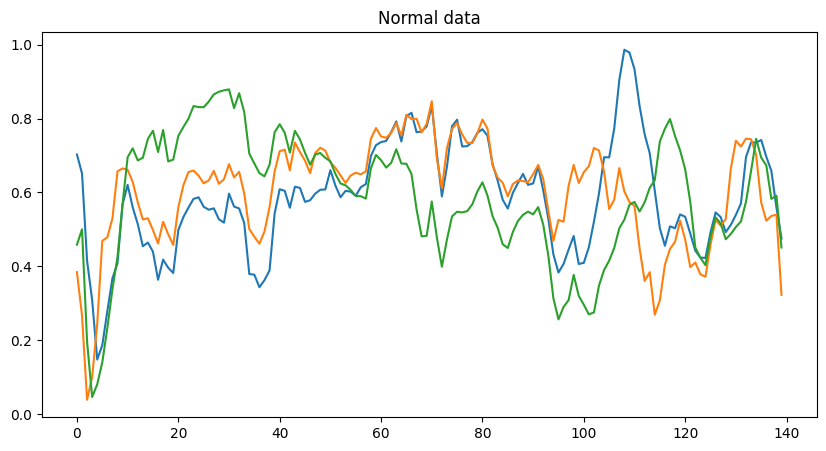

In [38]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])
plt.title('Normal data')
plt.show()

**Another way to do this:**

In [42]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Dense (64, activation = 'relu'),
        tf.keras.layers.Dense (32, activation="relu"),
        tf.keras.layers.Dense (16, activation="relu"),
        tf.keras.layers.Dense (8, activation="relu")
        ])
    self.decoder = tf.keras.Sequential([
        tf.keras.layers. Dense (16, activation = 'relu'),
        tf.keras.layers. Dense (32, activation="relu"),
        tf.keras.layers. Dense (64, activation="relu"),
        tf.keras.layers. Dense (140, activation="sigmoid")
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [43]:
model = AutoEncoder()

early_stopping=tf.keras.callbacks.EarlyStopping (monitor="val_loss", patience=2, mode="min")
model.compile(optimizer='adam', loss="mae")
history=model.fit(normal_train_data, normal_train_data, epochs=50, batch_size=120,
                  validation_data=(train_data_scaled[:,1:], train_data_scaled[:, 1:]),
                  shuffle=True,
                  callbacks=[early_stopping]
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1329 - val_loss: 0.1118
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0910 - val_loss: 0.0841
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0574 - val_loss: 0.0784
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0508 - val_loss: 0.0775
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0486 - val_loss: 0.0773
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0484 - val_loss: 0.0770
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0494 - val_loss: 0.0766
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0475 - val_loss: 0.0757
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0478 - val_loss: 0.0754
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0478 - val_loss: 0.0751
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0473 - val_loss: 0.0746
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0485 - 

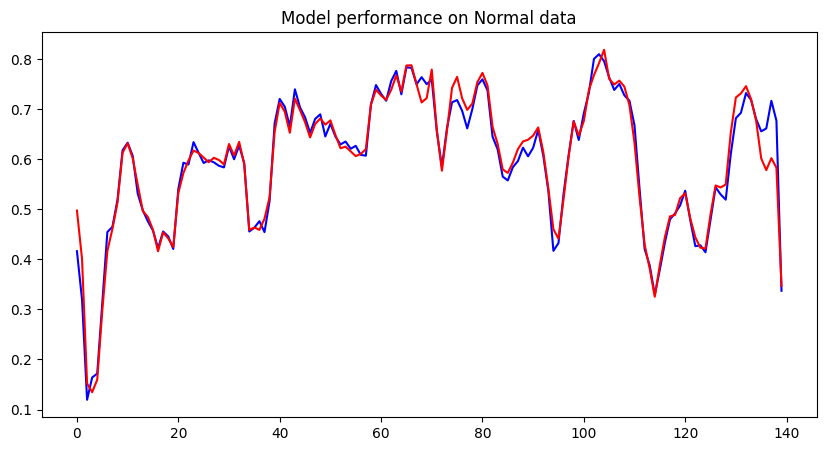

In [44]:
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out= model.decoder(encoder_out).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoder_out[0], 'r')
plt.title("Model performance on Normal data")
plt.show()

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


(array([ 9., 32., 64., 57., 52., 60., 39., 43., 31., 18., 26., 13., 17.,
         8., 10.,  9.,  8.,  5.,  3.,  3.,  0.,  2.,  2.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.01092561, 0.01320024, 0.01547487, 0.0177495 , 0.02002413,
        0.02229876, 0.02457339, 0.02684802, 0.02912265, 0.03139728,
        0.03367191, 0.03594654, 0.03822117, 0.0404958 , 0.04277043,
        0.04504506, 0.04731969, 0.04959432, 0.05186895, 0.05414358,
        0.05641821, 0.05869284, 0.06096747, 0.0632421 , 0.06551673,
        0.06779136, 0.07006599, 0.07234062, 0.07461525, 0.07688988,
        0.07916451, 0.08143914, 0.08371377, 0.0859884 , 0.08826303,
        0.09053766, 0.09281229, 0.09508692, 0.09736155, 0.09963618,
        0.10191081, 0.10418544, 0.10646007, 0.1087347 , 0.11100933,
        0.11328396, 0.11555858, 0.11783321, 0.12010784, 0.12238247,
        0.1246571 ]),
 <BarContainer

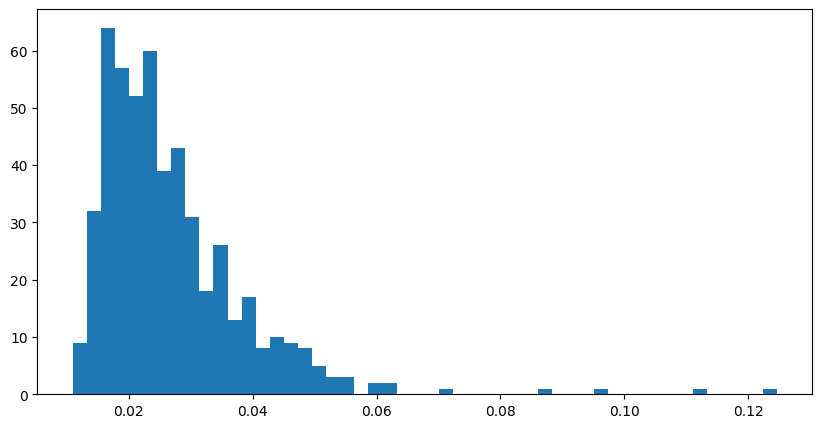

In [45]:
reconstruction = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstruction, normal_test_data)
plt.hist(train_loss, bins=50)